In [186]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

In [187]:
class Instance:
    def __init__(self, name, n=0, e=0, s=0, mi=0.0, c=0.0, t=0.0, ae=False, p=None):
        self.name = name
        self.nodes = n
        self.edges = e
        self.scenarios = s
        self.max_inflation = 0
        self.cost = 0
        self.time = 0
        self.all_equal = ae
        self.probabilities = p

In [188]:
# Name, nodes, edges, scenarios, max_inflation, cost, time, all_equal, probabilities
[NODES, EDGES, SCENARIOS, MAX_I, COST, TIME, ALL_EQ, PROBS] = range(8)

instances = {}

with open('small_data.csv', 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in csv_reader:
        for i in range(1, 4):
            row[i] = int(row[i])
        for i in range(4, len(row)):
            row[i] = float(row[i])
        value = row[1:8] + [row[8:]]
        value[ALL_EQ] = value[ALL_EQ] == 1
        name = row[0].split('_')[0]
        instances.setdefault(name,{5:{0.3:None, 0.5:None, 1.0:None}, 10:{0.3:None, 0.5:None, 1.0:None}, 20:{0.3:None, 0.5:None, 1.0:None}})
        instances[name][value[SCENARIOS]][value[MAX_I]] = value

for i in instances.items():
    print(i)

('kroB100', {5: {0.3: [100, 4950, 5, 0.3, 22310.0, 984.86, True, [0.18, 0.23, 0.23, 0.15, 0.21]], 0.5: [100, 4950, 5, 0.5, 22328.0, 975.124, True, [0.21, 0.25, 0.08, 0.26, 0.2]], 1.0: [100, 4950, 5, 1.0, 23141.0, 1332.13, True, [0.03, 0.15, 0.29, 0.35, 0.18]]}, 10: {0.3: [100, 4950, 10, 0.3, 22222.0, 1907.34, True, [0.11, 0.1, 0.18, 0.07, 0.09, 0.02, 0.03, 0.02, 0.19, 0.19]], 0.5: [100, 4950, 10, 0.5, 22260.0, 1910.61, True, [0.02, 0.12, 0.13, 0.11, 0.1, 0.13, 0.13, 0.12, 0.03, 0.11]], 1.0: [100, 4950, 10, 1.0, 22757.0, 2443.44, True, [0.05, 0.11, 0.1, 0.17, 0.05, 0.06, 0.13, 0.02, 0.17, 0.14]]}, 20: {0.3: [100, 4950, 20, 0.3, 22202.0, 3485.11, True, [0.06, 0.05, 0.08, 0.03, 0.0, 0.06, 0.07, 0.09, 0.03, 0.09, 0.03, 0.09, 0.04, 0.02, 0.06, 0.01, 0.05, 0.06, 0.02, 0.06]], 0.5: [100, 4950, 20, 0.5, 22307.0, 4488.63, True, [0.06, 0.01, 0.0, 0.02, 0.08, 0.01, 0.04, 0.09, 0.04, 0.07, 0.09, 0.04, 0.09, 0.05, 0.01, 0.03, 0.03, 0.15, 0.09, 0.0]], 1.0: [100, 4950, 20, 1.0, 22763.0, 4944.59, True

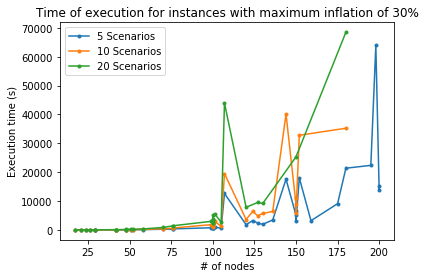

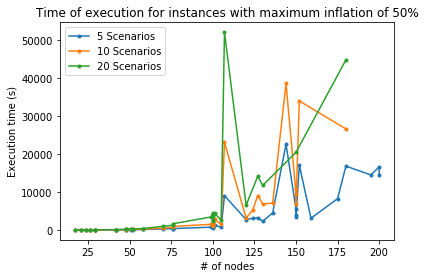

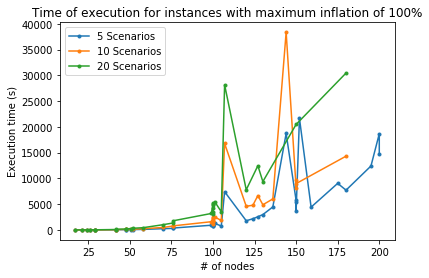

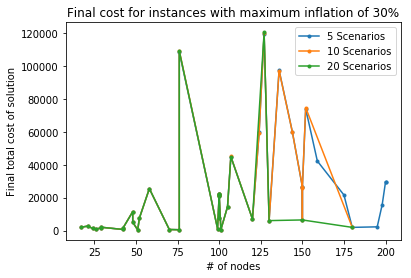

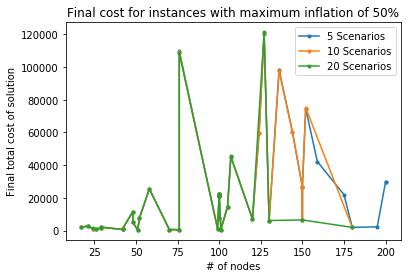

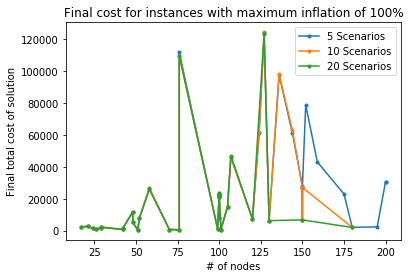

In [189]:
def equal_float(a, b):
    tau = 1e-5
    return abs(a - b) < tau

def sort_two_lists(a,b):
    return (list(t) for t in zip(*sorted(zip(a, b), key=lambda x: x[0])))

def plot_field(instances, field, max_inflation):
    nodes_5 = []
    nodes_10 = []
    nodes_20 = []
    field_5 = []
    field_10 = []
    field_20 = []
    
    for s in instances.values():
        #print(i)
        nodes = s[5][0.3][NODES]
        if s[5][max_inflation] is not None:
            field_5.append(s[5][max_inflation][field])
            nodes_5.append(nodes)
        if s[10][max_inflation] is not None:
            field_10.append(s[10][max_inflation][field])
            nodes_10.append(nodes)
        if s[20][max_inflation] is not None:
            field_20.append(s[20][max_inflation][field])
            nodes_20.append(nodes)
            
    nodes_5, field_5 = sort_two_lists(nodes_5, field_5)
    nodes_10, field_10 = sort_two_lists(nodes_10, field_10)
    nodes_20, field_20 = sort_two_lists(nodes_20, field_20)
            
    plt.plot(nodes_5, field_5, label='5 Scenarios', marker='.')
    plt.plot(nodes_10, field_10, label='10 Scenarios', marker='.')
    plt.plot(nodes_20, field_20, label='20 Scenarios', marker='.')
    plt.xlabel('# of nodes')
    title = ''
    if field is TIME:
        plt.ylabel('Execution time (s)')
        title = 'Time of execution'
    elif field is COST:
        plt.ylabel('Final total cost of solution')
        title = 'Final cost'
    plt.legend()
    plt.title('{:s} for instances with maximum inflation of {:d}%'.format(title, int(100 * max_inflation)))
    
    plt.savefig('images/{:s}_{:d}.png'.format('_'.join(title.lower().split()), int(max_inflation * 10)), dpi=300, bbox_inches='tight', format='png')
    plt.show()

for i in [0.3, 0.5, 1.0]:
    plot_field(instances, TIME, i)
for i in [0.3, 0.5, 1.0]:
    plot_field(instances, COST, i)


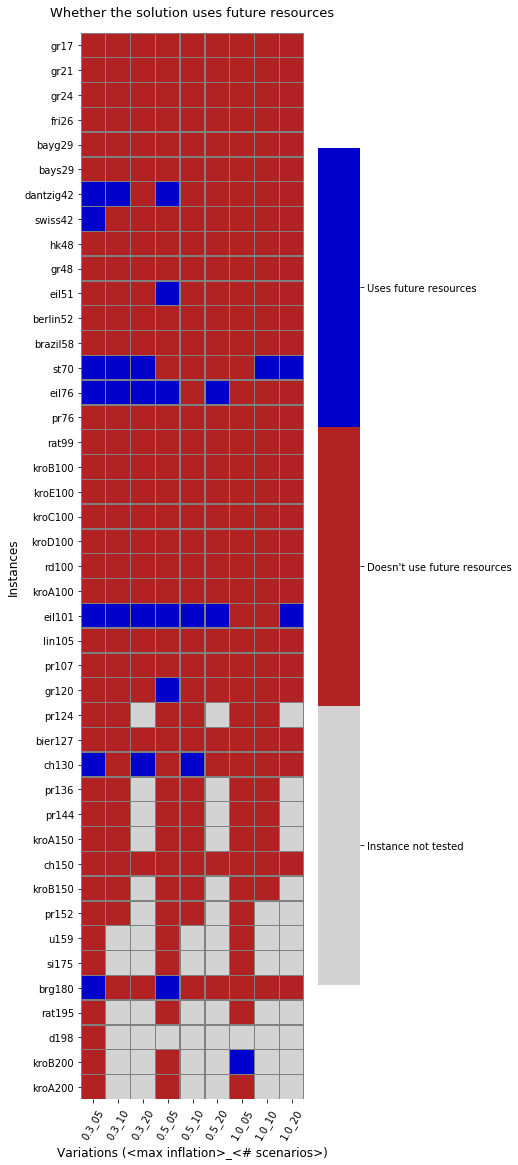

In [190]:
heatmap = []
names = []
nodes = []

for name, s in instances.items():
    names.append(name)
    nodes.append(s[5][0.3][NODES])
    line = []
    for j in [0.3, 0.5, 1.0]:
        for i in [5, 10, 20]:
            if s[i][j] is not None:
                line.append(float(not s[i][j][ALL_EQ]))
                if line[-1] == 0.0:
                    line[-1] += 0.5
            else:
                line.append(0.0)
    heatmap.append(line)

_, names = sort_two_lists(nodes, names)
nodes, heatmap = sort_two_lists(nodes, heatmap)
heatmap = np.array(heatmap)

variations = []
for j in ['0.3', '0.5', '1.0']:
    for i in ['05', '10', '20']:
        variations.append('{:s}_{:s}'.format(j,i))
        

def plot_confusion_matrix(cm, title, x_name, y_name):
    df_cm = pd.DataFrame(cm, index=y_name, columns=x_name)
    plt.figure(figsize = (5,20))
    
    myColors = ('lightgrey', 'firebrick', 'mediumblue')
    cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

    ax = sn.heatmap(df_cm, linewidth=0.5, cbar=True, linecolor='Grey', cmap=cmap, square=True)
    
    # Manually specify colorbar labelling after it's been generated
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([0.1666, 0.5, 0.8334])
    colorbar.set_ticklabels(['Instance not tested', 'Doesn\'t use future resources', 'Uses future resources'])
    
    plt.ylabel("Instances", fontsize=12)
    plt.xlabel("Variations (<max inflation>_<# scenarios>)", fontsize=12)
    plt.title(title, fontsize=13)
    
    plt.xticks(rotation=60) 

    ttl = ax.title
    ttl.set_position([0.5, 1.01])
    
    plt.savefig('images/all_equal_heatmap.png', dpi=300, bbox_inches='tight', format='png')
    
    plt.show()
    
plot_confusion_matrix(heatmap, 'Whether the solution uses future resources', variations, names)

In [191]:
with open('small_data_table.csv', 'w') as f:
    for name in names:
        line = name
        for i in [0.3, 0.5, 1.0]:
            for j in [5, 10, 20]:
                instance = instances[name][j][i]
                cost = 'X'
                time = 'X'
                if instance is not None:
                    line += ',{:d}'.format(int(instance[COST]))
                    line += ',{:.1f}'.format(instance[TIME])
                else:
                    line += ',X,X'
        line += '\n'
        f.write(line)

                
        